In [1]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'
;

In [11]:
'''FOLLOWING BLOCKS OF CODE ALL CORRELATE TO m12i''';

In [3]:
''' READ IN OF DATA, m12i '''


CO_0_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CO_J10/"
CO_48_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CO_J10/"
CO_70_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CO_J10/"
CO_90_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CO_J10/"

CII_0_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CII_158mu/"
CII_48_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CII_158mu/"
CII_70_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CII_158mu/"
CII_90_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CII_158mu/"

NII_0_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/NII_6585A/"
NII_48_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/NII_6585A/"
NII_70_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/NII_6585A/"
NII_90_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/NII_6585A/"

Halpha_0_HI_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HI/"
Halpha_48_HI_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HI/"
Halpha_70_HI_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HI/"
Halpha_90_HI_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HI/"
Halpha_0_HII_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HII/"
Halpha_48_HII_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HII/"
Halpha_70_HII_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HII/"
Halpha_90_HII_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HII/"

OIII_0_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/OIII_5007A/"
OIII_48_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/OIII_5007A/"
OIII_70_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/OIII_5007A/"
OIII_90_m12i = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/OIII_5007A/"

CO_list_m12i = [CO_0_m12i, CO_48_m12i, CO_70_m12i, CO_90_m12i]
CII_list_m12i = [CII_0_m12i, CII_48_m12i, CII_70_m12i, CII_90_m12i]
NII_list_m12i = [NII_0_m12i, NII_48_m12i, NII_70_m12i, NII_90_m12i]
Halpha_list_HI_m12i = [Halpha_0_HI_m12i, Halpha_48_HI_m12i, Halpha_70_HI_m12i, Halpha_90_HI_m12i]
Halpha_list_HII_m12i = [Halpha_0_HII_m12i, Halpha_48_HII_m12i, Halpha_70_HII_m12i, Halpha_90_HII_m12i]
OIII_list_m12i = [OIII_0_m12i, OIII_48_m12i, OIII_70_m12i, OIII_90_m12i]

In [16]:
CO_vsigma_m12i = []
for l in CO_list_m12i:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["CO_J10"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 

    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/60) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -7:
                numerator[i][j] = 0
                denominator[i][j] = 0

    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)    

    CO_vsigma_m12i.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


In [15]:
CII_vsigma_m12i = []
for l in CII_list_m12i:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["CII_158mu"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -6:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
        
    CII_vsigma_m12i.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


In [17]:
NII_vsigma_m12i = []
for l in NII_list_m12i:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["NII_6585A"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
        
    NII_vsigma_m12i.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide


In [13]:
Halpha_vsigma_m12i = []
for l in range(len(Halpha_list_HI_m12i)):
    filepath_tot = Halpha_list_HI_m12i[l] + 'image_tot.hdf5'
    filepath_con = Halpha_list_HI_m12i[l] + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)
    
    
    filepath_tot_2 = Halpha_list_HII_m12i[l] + 'image_tot.hdf5'
    filepath_con_2 = Halpha_list_HII_m12i[l] + 'image_continuum.hdf5'
    file_con_2 = h5.File(filepath_con,'r')
    file_tot_2 = h5.File(filepath_tot,'r')

    npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
    npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

    image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

    image_array_2[image_array_2 < 0] = 0

    frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

    image_array = image_array + image_array_2

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["Halpha"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -6:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
        
    Halpha_vsigma_m12i.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in true_divide


In [18]:
OIII_vsigma_m12i = []
for l in OIII_list_m12i:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["OIII_5007A"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)

    OIII_vsigma_m12i.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


In [19]:
'''PRINTING VALUES FOR m12i'''
print("CO:", CO_vsigma_m12i)
print("CII:", CII_vsigma_m12i)
print("NII:", NII_vsigma_m12i)
print("Halpha:", Halpha_vsigma_m12i)
print("OIII:", OIII_vsigma_m12i)

OIII: [1.0668269975738989, 3.798894124879427, 4.203575614256069, 3.9145133570231287]
NII: [1.3577421831262255, 6.426473656329614, 6.492792449934114, 5.213709055854576]
Halpha: [0.5835641507711709, 2.310302512491078, 2.6972265643233504, 2.4299920428087574]
CII: [0.9798723839355372, 6.080177023903556, 5.822609201408755, 3.199571508068959]
CO: [1.44452433557701, 7.286743856892585, 7.7549943385803175, 3.7258636097857907]


In [4]:
'''FOLLOWING BLOCKS OF CODE ALL CORRELATE TO A4-151''';

In [2]:
''' READ IN OF DATA, A4 '''

CO_0_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CO_J10/"
CO_48_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CO_J10/"
CO_70_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CO_J10/"
CO_90_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CO_J10/"

CII_0_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CII_158mu/"
CII_48_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CII_158mu/"
CII_70_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CII_158mu/"
CII_90_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CII_158mu/"

NII_0_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/NII_6585A/"
NII_48_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/NII_6585A/"
NII_70_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/NII_6585A/"
NII_90_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/NII_6585A/"

Halpha_0_HI_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HI/"
Halpha_48_HI_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HI/"
Halpha_70_HI_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HI/"
Halpha_90_HI_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HI/"
Halpha_0_HII_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HII/"
Halpha_48_HII_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HII/"
Halpha_70_HII_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HII/"
Halpha_90_HII_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HII/"

OIII_0_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OIII_5007A/"
OIII_48_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/OIII_5007A/"
OIII_70_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/OIII_5007A/"
OIII_90_A4 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/OIII_5007A/"

CO_list_A4 = [CO_0_A4, CO_48_A4, CO_70_A4, CO_90_A4]
CII_list_A4 = [CII_0_A4, CII_48_A4, CII_70_A4, CII_90_A4]
NII_list_A4 = [NII_0_A4, NII_48_A4, NII_70_A4, NII_90_A4]
Halpha_list_HI_A4 = [Halpha_0_HI_A4, Halpha_48_HI_A4, Halpha_70_HI_A4, Halpha_90_HI_A4]
Halpha_list_HII_A4 = [Halpha_0_HII_A4, Halpha_48_HII_A4, Halpha_70_HII_A4, Halpha_90_HII_A4]
OIII_list_A4 = [OIII_0_A4, OIII_48_A4, OIII_70_A4, OIII_90_A4]

In [7]:
CO_vsigma_A4 = []
for l in CO_list_A4:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["CO_J10"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)

    CO_vsigma_A4.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


In [6]:
CII_vsigma_A4 = []
for l in CII_list_A4:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["CII_158mu"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
        
    CII_vsigma_A4.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


In [8]:
NII_vsigma_A4 = []
for l in NII_list_A4:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["NII_6585A"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)

    NII_vsigma_A4.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide


In [5]:
Halpha_vsigma_A4 = []
for l in range(len(Halpha_list_HI_A4)):
    filepath_tot = Halpha_list_HI_A4[l] + 'image_tot.hdf5'
    filepath_con = Halpha_list_HI_A4[l] + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)
    
    
    filepath_tot_2 = Halpha_list_HII_A4[l] + 'image_tot.hdf5'
    filepath_con_2 = Halpha_list_HII_A4[l] + 'image_continuum.hdf5'
    file_con_2 = h5.File(filepath_con,'r')
    file_tot_2 = h5.File(filepath_tot,'r')

    npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
    npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

    image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

    image_array_2[image_array_2 < 0] = 0

    frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

    image_array = image_array + image_array_2

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["Halpha"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
        
    Halpha_vsigma_A4.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in true_divide


In [9]:
OIII_vsigma_A4 = []
for l in OIII_list_A4:
    filepath_tot = l + 'image_tot.hdf5'
    filepath_con = l + 'image_continuum.hdf5'
    file_con = h5.File(filepath_con,'r')
    file_tot = h5.File(filepath_tot,'r')

    npix_x = np.shape(file_tot['image_array'][:])[0]
    npix_y = np.shape(file_tot['image_array'][:])[1]

    image_array = file_tot['image_array'][:] - file_con['image_array'][:]

    image_array[image_array < 0] = 0

    frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

    #moment 0
    integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
    delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

    integrated_image_array_moment0[0,0] = 0 #final moment 0 array
    moment_0 = np.asarray(integrated_image_array_moment0) 

    #moment 1
    lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712, 
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

    lambda_0 = lambda_0_dict["OIII_5007A"]
    lambda_array = np.array(file_con['lambda_array'])
    velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


    moment1_noint = velocity_arr * image_array

    integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

    isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
    isolate_moment_1[0,0] = 0 #final moment 1 array
    moment_1 = np.asarray(isolate_moment_1) 

    #moment 2
    isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

    for i in range(len(velocity_arr)):
        for j in range(len(image_array)):
            for k in range(len(image_array)):
                isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

    moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

    integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

    for i in range(npix_x):
        for j in range(npix_y):
            integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

    integrated_image_array_moment2[0,0] = 0

    isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
    isolate_moment_2[0,0] = 0

    isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
    moment_2 = np.asarray(isolate_moment_2) 
    
    #v/sigma
    numerator = moment_0 * ((moment_1)*(moment_1))
    denominator = moment_0 * ((moment_2)*(moment_2))

    #NaN Catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
    

    '''
    #Half Mass Radius
    r = 256 * (2*4.26/10) #m12i
    r = 256 * (2*0.82/4) #A4-151
    tolerance = 1 # CHANGE depending on accuracy we want
    midpointx = len(numerator) / 2
    midpointy = len(numerator[0]) / 2

    half_num = []
    half_denom = [] 
    for i in range(len(numerator)):
        for j in range(len(numerator[i])): 
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist <= r:
                half_num.append(numerator[i][j])
                half_denom.append(denominator[i][j])    

    # if half mass is true
    v_sigma_sq = (np.sum(half_num))/(np.sum(half_denom))
    v_sigma = np.sqrt(v_sigma_sq)
    '''
    
    # Low Intensity Mask
    for i in range(len(moment_0)):
        for j in range(len(moment_0[i])):
            if np.log10(moment_0[i][j]/np.max(moment_0)) < -5:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    # if half mass is false
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)

    OIII_vsigma_A4.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


In [10]:
'''PRINTING VALUES FOR A4'''
print("CO:", CO_vsigma_A4)
print("CII:", CII_vsigma_A4)
print("NII:", NII_vsigma_A4)
print("Halpha:", Halpha_vsigma_A4)
print("OIII:", OIII_vsigma_A4)

[0.6892249153215765, 0.48127344146122436, 0.5501471982852761, 0.5441657246834462]
[0.9294653603160659, 1.4137863337648657, 1.6601406668436407, 1.6902755879737663]
[1.5887533711779938, 1.684358644033289, 2.0067005518198204, 2.104401345019621]
[2.779308520017005, 2.7594369929421534, 2.6922878004518163, 2.9349950886694467]
[1.5993986318620994, 2.1170929457375482, 2.143288273030992, 2.4359151362707494]


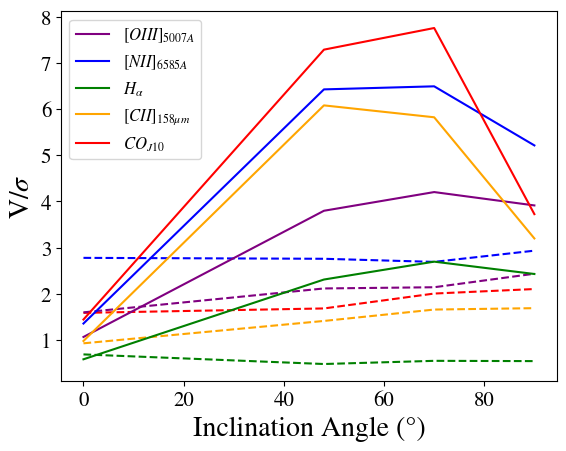

In [22]:
'''PLOTTING V/SIGMA VS INCLINATION FOR m12i AND A4'''

incs = [0, 48, 70, 90]

#A4
plt.plot(incs, CO_vsigma_A4, linestyle = "--", color = "red")
plt.plot(incs, CII_vsigma_A4, linestyle = "--", color = "orange")
plt.plot(incs, NII_vsigma_A4, linestyle = "--", color = "green")
plt.plot(incs, Halpha_vsigma_A4, linestyle = "--", color = "blue")
plt.plot(incs, OIII_vsigma_A4, linestyle = "--", color = "purple")


#m12i
plt.plot(incs, CO_vsigma_m12i, label = r"$CO_{J10}$", color = "red")
plt.plot(incs, CII_vsigma_m12i, label = r"$[CII]_{158{\mu}m}$", color = "orange")
plt.plot(incs, NII_vsigma_m12i, label = r"$[NII]_{6585A}$", color = "green")
plt.plot(incs, Halpha_vsigma_m12i, label = r"$H_{\alpha}$", color = "blue")
plt.plot(incs, OIII_vsigma_m12i, label = r"$[OIII]_{5007A}$", color = "purple")


plt.xlabel("Inclination Angle (°)", fontsize = 20)
plt.ylabel("V/$\sigma$", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)

#plt.savefig('vsigma_vs_inc.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()